# 波束预测数据集

## 数据集概览

训练数据集由task1中1000个环境（每个环境10个样本）、task2中100个环境（每个环境10个样本）以及task3中1个环境（1000个样本）构成。在示例代码中，训练集和验证集按照9:1划分，选手可以自行划分。测试集由task1中1000个环境（每个环境1个样本）、task2中100个环境（每个环境10个样本）以及task3中1个环境（1000个样本）构成，不对选手开放。在训练数据集中，task1、task2、和task3的目录如下：



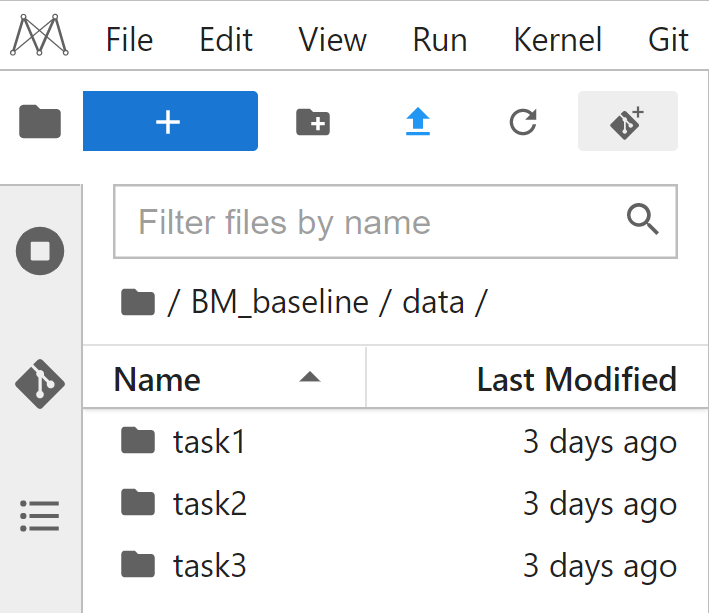

以task1为例，其包含1000个环境，分别由1000个子文件夹构成，每个环境（子文件夹）包含波束增益信息(beamGains.npy)、环境信息(environment.png)以及位置信息(locations.npy)，如下图所示：

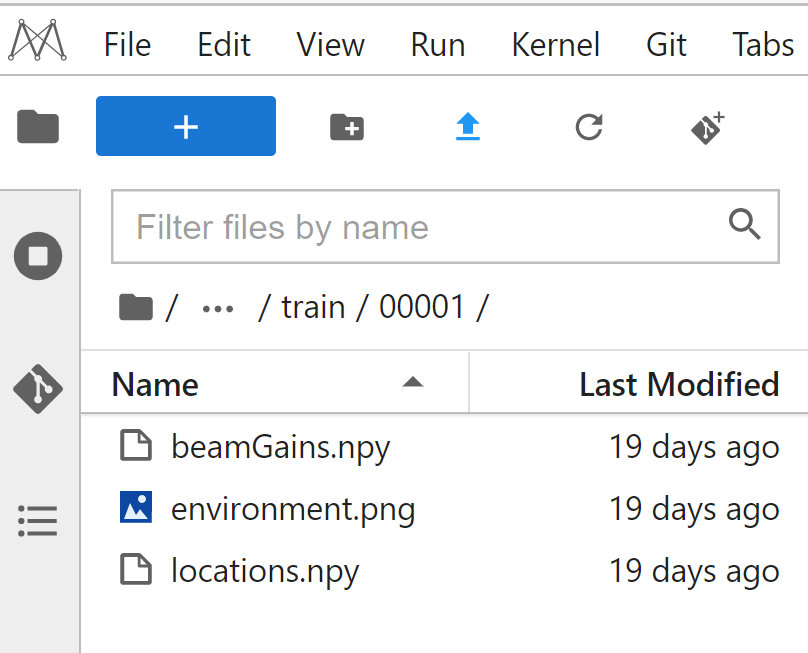

## 波束增益信息

以task1中第一个环境为例，波束增益为一个(10,64,4)的矩阵。其中，10为样本数、64为发射天线数、4为接收天线数。读取波束增益的代码如下：

gains.shape=(10, 64, 4)


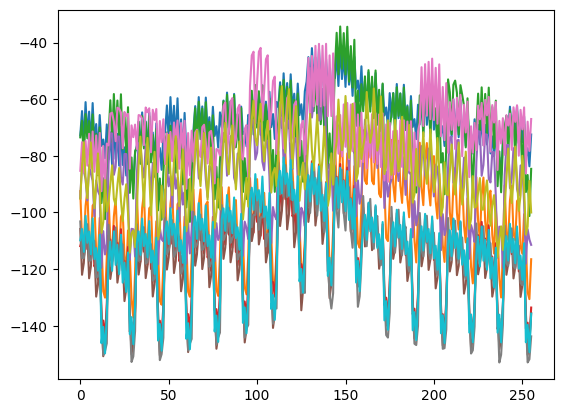

In [1]:
import numpy as np
import matplotlib.pyplot as plt
gains=np.load('./data/task1/train/00001/beamGains.npy')
print(f'gains.shape={gains.shape}')

for i in range(gains.shape[0]):
    plt.plot(gains[i,:,:].reshape(-1,1))
plt.show()

## 场景与位置信息

environment.png为场景信息图，比例尺为1pix:0.36m，其中阴影部分为建筑物。locations.npy为基站和用户对的位置信息，实际位置大小为其二分之一。读取并对位置信息进行转化的代码如下：

The width and height of the map are w=350, h=475 (unit: pix)
The width and height of the map are w=126.18848, h=171.34447 (unit: m)
The true scale of this map is w_pix:w_m/2=1pix:0.36m


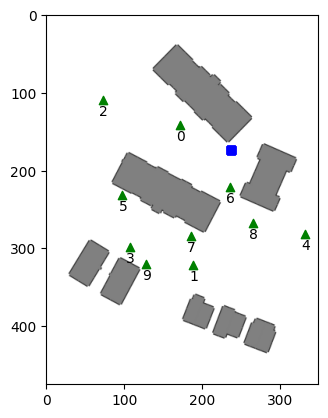

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

Img_env = Image.open('./data/task1/train/00001/environment.png')
transform=transforms.Compose([transforms.Grayscale(),transforms.ToTensor()])
Img_evn_show=Img_env
Img_env=1-transform(Img_env)
Img_env[Img_env!=0]=1 ## when there is a buliding, the value is 1
Img_env=np.asarray(Img_env,dtype=int)
Img_env=np.transpose(np.squeeze(Img_env),(1,0))
w_pix=Img_env.shape[0]
h_pix=Img_env.shape[1]
print(f'The width and height of the map are w={w_pix}, h={h_pix} (unit: pix)')

loc=np.load('./data/task1/train/00001/locations.npy',allow_pickle=True)
w_m=loc[0][0].detach().cpu().numpy()
h_m=loc[1][0].detach().cpu().numpy()
print(f"The width and height of the map are w={w_m/2}, h={h_m/2} (unit: m)")

scale1=w_m/2/w_pix # The true scale of this map(environment)
scale2=w_pix/w_m # Map into the pix for plotting
print(f'The true scale of this map is w_pix:w_m/2={1}pix:{scale1:.2f}m')

BS_loc=loc[2]
##print(f'The true BS loc is {BS_loc/2} (unit: m)')
##---Map the locations into pix----##
BS_loc[:,0]=BS_loc[:,0]*scale2
BS_loc[:,1]=BS_loc[:,1]*scale2

UE_loc=loc[3]
UE_loc[:,0]=UE_loc[:,0]*scale2
UE_loc[:,1]=UE_loc[:,1]*scale2

plt.imshow(Img_evn_show)

for i in range(UE_loc.shape[0]):
    plt.scatter(BS_loc[i,0],h_pix-BS_loc[i,1],marker='s',c='blue')
    plt.scatter(UE_loc[i,0],h_pix-UE_loc[i,1],marker='^',c='green')
    plt.text(UE_loc[i,0]-5,h_pix-UE_loc[i,1]+20,str(i))
    

上述示例代码是针对单个场景的，对于不同task下的数据读取，可以参考dataset.py。注意，dataset.py中包含一些对原始数据简单的处理（例如归一化）。鼓励选手对原始数据进行特征工程，以便得到更好的性能。